
# Project: Investigate a Dataset - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from over 100k medical appointments in Brazil. It is focused on whether or not the patients show up for their appointments. 
There are 14 variables in this datasets. 
### Data Dictionary
**These variables are as follows:**
                  
>| No. | Variable | Description |
| :-: | -------: | :---------- |
| 01 | `PatientId` | Identification of a patient |
| 02 | `AppointmentID` | Identification of each appointment |
| 03 | `Gender` | `M` for Male or `F` for Female |
| 04 | `ScheduledDay` | The day the patient set up their appointment. |
| 05 | `AppointmentDay` | The day of the actual appointment, when the patient has to visit the doctor. |
| 06 | `Age` | How old is the patient. |
| 07 | `Neighbourhood` | The location of the hospital. |
| 08 | `Scholarship` | Whether or not the patient is enrolled in Brasilian welfare program ([Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)). |
| 09 | `Hipertension` | True or False |
| 10 | `Diabetes` | True or False |
| 11 | `Alcoholism` | True or False |
| 12 | `Handcap` | Number of handicaps of the patient |
| 13 | `SMS_received` | True or False. (1 or more messages sent to the patient) |
| 14 | `No-show` | Yes (when the patient did __NOT__ show up in their appointment) or No. |

### Some Question(s) for Analysis we can ask :
1. [which gender has a greater commitment to attend than the other ?](#q1)

2. [which age group has a greater commitment to attend than the others ?](#q2)

3. [is having more diseases increase the possibility of showing-up ?](#q3)
4.[is there is a relation between getting old and having more diseases ?](#q4)


first we should import every thing we need :

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("fivethirtyeight")



<a id='wrangling'></a>
## Data Wrangling



### General Properties (inspecting the data)


first we should load our data and store it as a dataframe so we can handle it

In [2]:
#importing my data in csv file
df = pd.read_csv('KaggleV2-May-2016.csv')

then we take a look on the data to see its general propereties and  if there is a problem we can fix

so we initially see its first 5 rows to give us an idea about the general aspect of our data

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


then we wiil dive deeper to see more information about the data 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


from previous information we can see that

our data hasn't any lost value

it has 14 columns and their names 

110527 rows which  contain the information of each patient

**.....................**

lets's make some describtive statistics to see what we can get

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


from describtive statistics it shows :
-1 value for ages as min

hancap max is 4 but i think this variable should be binary

**.................**

In [6]:
df.isnull().sum().sum()

0

no lost values 

**..................**

In [7]:
df.duplicated().sum()

0

 no dublicated rows


### Data Cleaning

 >so after investigating the date i see  it may need a little cleaning with renaming of some columns names so it can be easier to understand 

>so first  **i will rename some columns to make more sense**

>>i will rename the column **(Hipertension to Hypertension)**,**(Handcap to Handicap)**,**(No-show to Missed)**

In [8]:
df.rename(columns = {'Hipertension':'Hypertension','Handcap':'Handicap','No-show':'Missed'},inplace=True)

let's see the unique values of handicap column

In [9]:
df['Handicap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

>second **we need to replace 2,3,4 with 1 to make them binary**

In [10]:
df['Handicap'].replace([2,3,4],1,inplace=True)

#and to check of our work:
df['Handicap'].unique()

array([0, 1], dtype=int64)

>**then we should clean the age values by removing the negative age**

In [11]:
df=df[df['Age'] > -1]

In [12]:
#and to check of our work:
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

the minimum value of age is 0 not negative value which refers to neonates patients

>**the 2 columns (ScheduledDay/AppointmentDay) should be converted to *datetime* type so it will be easy to handle**

In [13]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [14]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

then we chick what we done :

In [15]:
df[['ScheduledDay','AppointmentDay']].dtypes

ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
dtype: object

**...............................**

**lets recheck the data after cleaning :**

In [16]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Missed
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No


>we take a look on the other columns to see if there is a hidden problem

In [17]:
df['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

**Gender column looks good**

In [18]:
df['Missed'].value_counts()

No     88207
Yes    22319
Name: Missed, dtype: int64

**Missed column looks good**

In [19]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


by looking to max and min of (Scholarship	Hypertension	Diabetes	Alcoholism	Handicap	SMS_received ) columns : 

>**their values are binary and doesn't need more cleaning**

 ### The New Data Dictionary
After these edits, the new data dictionary is as follows:

| No. | Variable | Description |
| :-: | -------: | :---------- |
| 01 | `PatientId` | Identification of a patient |
| 02 | `AppointmentID` | Identification of each appointment |
| 03 | `Gender` | `M` for Male or `F` for Female |
| 04 | `ScheduledDay` | The day the patient set up their appointment. |
| 05 | `AppointmentDay` | The day of the actual appointment, when the patient has to visit the doctor. |
| 06 | `Age` | How old is the patient. |
| 07 | `Neighbourhood` | The location of the hospital. |
| 08 | `Scholarship` | Whether or not the patient is enrolled in Brasilian welfare program ([Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)). |
| 09 | `Hypertension` | True or False |
| 10 | `Diabetes` | True or False |
| 11 | `Alcoholism` | True or False |
| 12 | `Hanidcap` | Number of handicaps of the patient |
| 13 | `SMS_received` | True or False. (1 or more messages sent to the patient) |
| 14 | `Missed` | Yes (when the patient did __NOT__ show up in their appointment) or No. |

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (which gender has a greater commitment to attend than the other ?)<a id='q1'>

step 1 : i will filter the data by Missed column only contain  people who didn't attend.

step 2 : in this filtered data i will group it by gender column so the data will be groupd into males anf females

step 3 : i will collect the total number of both males and females who didn't attend then get their percentage from the total number of males and females respectevly

step 4 : plotting what i get in a bar chart so it become easy to understand

In [37]:
#defining a function to avoid repetition
def filtering_calculating_percentage (column_label) :
    return  df.query('Missed == "Yes"').groupby(column_label).count()['PatientId'] / df.groupby(column_label).count()['PatientId'] * 100

In [38]:
#lets check if the function works
absence_rate = filtering_calculating_percentage('Gender')
absence_rate

Gender
F    20.314871
M    19.967948
Name: PatientId, dtype: float64

In [39]:
#the function works well and it will avoid the repetition

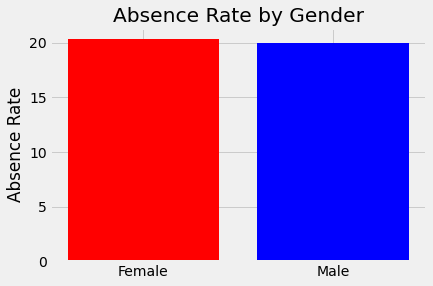

In [40]:
absence_rate = filtering_calculating_percentage('Gender')
plt.bar([1,2], absence_rate, tick_label= ['Female', 'Male'],color=['red','blue'])
plt.ylabel('Absence Rate')
plt.title('Absence Rate by Gender');

>the previous figure shows that there is no significant difference in not attending the Medical Appointment between males and females

also i want to see which gender getting an appointment than the other

In [58]:
df['Gender'].count()

110526

In [60]:
y = df['Gender'].value_counts()/df['Gender'].count()*100
y

F    64.997376
M    35.002624
Name: Gender, dtype: float64

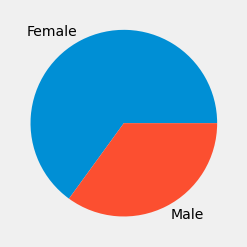

In [62]:
plt.pie(y , labels=['Female','Male']);

>so it seems that females are appointing than males 

### Research Question 2  (which age group has a greater commitment to attend than the others ? )<a id=q2>

to get an answer about this question .... 
<br>
i have to make a new column that contains the age numbers as age groups which are 
<br>
**('Baby(0-2)' , 'child(3-15)' , 'Young Adult(16-30)' , 'Middle-aged Adults(31-60)' , 'Old Adults(>60)')** 

In [21]:
bin_edges = [-1,2,15,30,60,df['Age'].max()+1]

In [22]:
bin_labels = ['Baby','child','Young Adult','Middle-aged Adults','Old Adults']

In [23]:
df['Age_Group'] = pd.cut(df['Age'], bin_edges , labels=bin_labels)

let's check the new last column

In [24]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Missed,Age_Group
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Old Adults
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Middle-aged Adults
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Old Adults
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,child
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Middle-aged Adults


>then i well try to get an answer from the data as follow :

step 1 : i will filter the data by **Missed column** only contain  people *who didn't attend*.

step 2 : in this filtered data i will group it by **Age_Group column** so the data will be groupd into the 5 age groups

step 3 : i will collect number of people who **(didn't attend)** in each age group  then get their percentage from the total number of people in each age group and store the result in *age_abscence_rate* variable.

step 4 : plotting what i get in a bar chart so it become easy to understand

In [41]:
age_abscence_rate = filtering_calculating_percentage('Age_Group')


In [42]:
age_abscence_rate

Age_Group
Baby                  17.577389
child                 23.136518
Young Adult           24.769645
Middle-aged Adults    19.548889
Old Adults            15.211011
Name: PatientId, dtype: float64

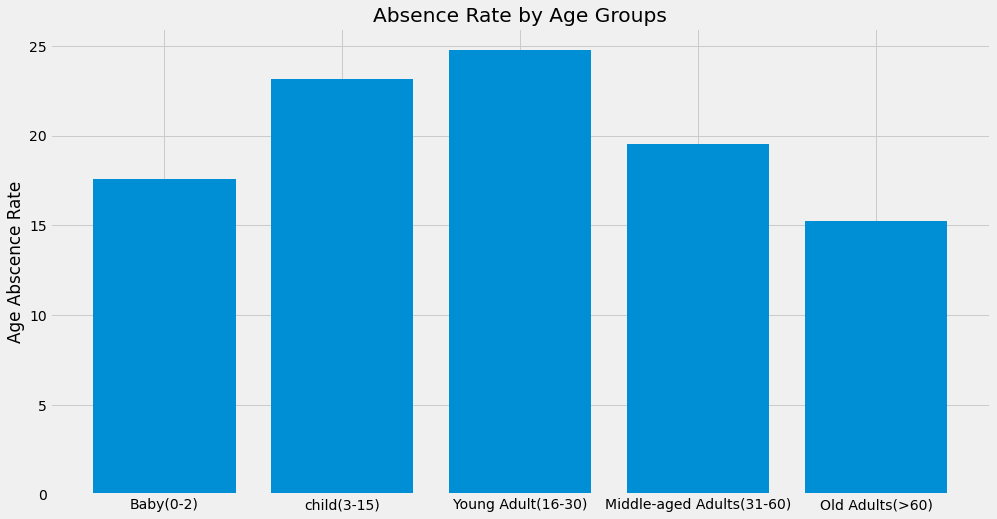

In [43]:
age_grop_labels = ['Baby(0-2)','child(3-15)','Young Adult(16-30)','Middle-aged Adults(31-60)','Old Adults(>60)']
plt.figure(figsize=(15,8))
plt.bar([1,2,3,4,5], age_abscence_rate, tick_label = age_grop_labels )

plt.ylabel('Age Abscence Rate');
plt.title('Absence Rate by Age Groups');


>this figure shows that the **Old Adults(>60)** is the heighest age group in commitment to attend than the others
<br>
and the heighest age group for not attending are **Young Adult(16-30)** followed by **child(3-15)**  

### Research Question 3  (is having more diseases increase the possibility of showing-up ? )<a id=q3>

to get an answer about this question ....
<br>
i have to make a new column that contains the number of diseases each patient has by adding the values in **(Hypertension , Diabetes , Alcoholism , Handicap)** columns

In [28]:
df['diseases_num'] = df['Hypertension']+df['Diabetes']+df['Alcoholism']+df['Handicap']

lets's check the new last column....

In [29]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Missed,Age_Group,diseases_num
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Old Adults,1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Middle-aged Adults,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Old Adults,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,child,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Middle-aged Adults,2


>then i well try to get an answer from the data as follow :

step 1 : i will filter the data by **Missed column** only contain  people *who  attend*.

step 2 : in this filtered data i will group it by **diseases_num column** so the data will be groupd into the 4 possibilities :
<br>
(0 disease (normal) , 1 disease , 2 diseases , 3 diseases , 4 diseases)

step 3 : i will collect number of people who **(attend)** in each possibility  then get their percentage from the total number of people in each possibility and store the result in *diseased_attendance_rate* variable.

step 4 : plotting what i get in a bar chart so it become easy to understand

In [30]:
diseased_attendance_rate = df.query('Missed == "No"').groupby('diseases_num')['PatientId'].count() / df.groupby('diseases_num')['PatientId'].count()*100


In [31]:
diseased_attendance_rate

diseases_num
0    79.072449
1    82.072505
2    82.136328
3    84.627832
4    69.230769
Name: PatientId, dtype: float64

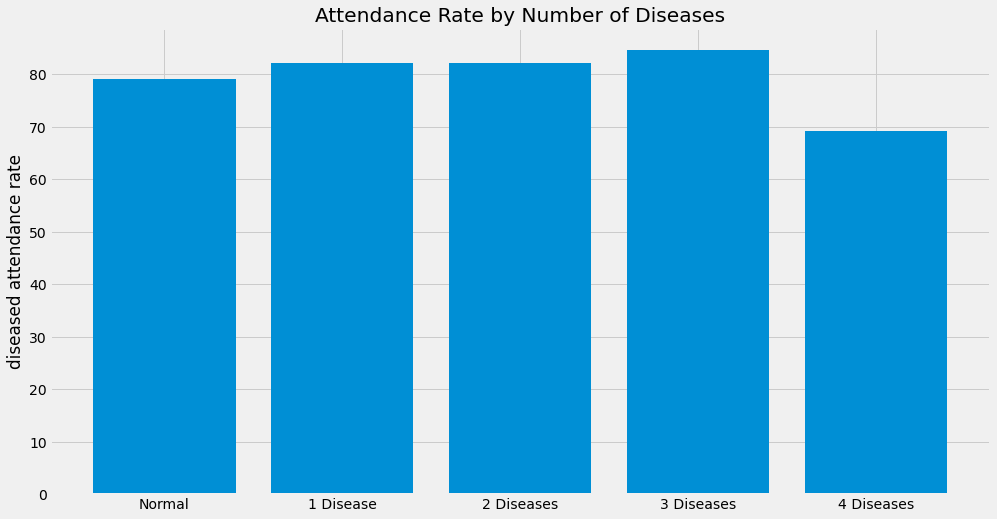

In [32]:
diseased_attendance_rate_labels = ['Normal','1 Disease','2 Diseases','3 Diseases','4 Diseases']
plt.figure(figsize=(15,8))
plt.bar([1,2,3,4,5], diseased_attendance_rate, tick_label = diseased_attendance_rate_labels )

plt.ylabel('diseased attendance rate');
plt.title('Attendance Rate by Number of Diseases');


> unfortunately this figure shows that There is no association between having 1 or more chronic diseases and the chances of the patient to show up 

### Research Question 4 (is there is a relation between getting old and having more diseases ? )<a id=q4>

i will try to answer this by plotting number of diseases and age columns in a scatter blot

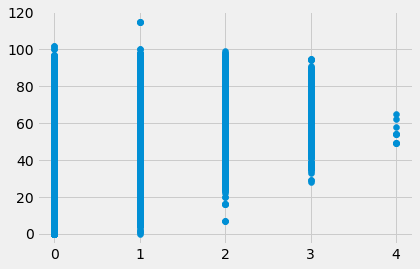

In [56]:
plt.scatter(df['diseases_num'],df['Age']);

 there's not a significan relation between the 2 variables
 <br>
 and the range of ages who have 1 disease are much more than who have 2,3 or 4 diseases 

<a id='conclusions'></a>
## Conclusions

In this anaysis, we have been looking for variables that increase or decrease the chances of patients to show up for their scheduled appointments.

>**1.the Gender didn't play a significant role to *increase or decrease* the chances of patients to show up both males and females are equal** although the Females appoinments was the more than that of males

>**2.the Old Adults(>60) is the heighest age group in commitment to attend than the others
and the heighest age group for not attending are Young Adult(16-30) followed by child(3-15)**

>**3.There is no association between having 1 or more chronic diseases and the chances of the patient to show up**

>**4. there's not a significan relation between getting old and having more diseases 
<br>
because the range of ages who have 1 disease are much more than who have 2,3 or 4 diseases** 

### Limitations

The age group of 0 years old is too large for one group. So, either infants (babies younger than 1 year old) really make a large portion of patients, or 0 is entered instead of null values during the data collection process so This should have been investigated.

the number of handicaps didn't explained enough so i tried to make them all binary 1 for yes and 0 for no

In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295